![Kayak](https://seekvectorlogo.com/wp-content/uploads/2018/01/kayak-vector-logo.png)

# Plan your trip with Kayak

## Company's description 📇

<a href="https://www.kayak.com" target="_blank">Kayak</a> is a travel search engine that helps user plan their next trip at the best price.

The company was founded in 2004 by Steve Hafner & Paul M. English. After a few rounds of fundraising, Kayak was acquired by <a href="https://www.bookingholdings.com/" target="_blank">Booking Holdings</a> which now holds:

* <a href="https://booking.com/" target="_blank">Booking.com</a>
* <a href="https://kayak.com/" target="_blank">Kayak</a>
* <a href="https://www.priceline.com/" target="_blank">Priceline</a>
* <a href="https://www.agoda.com/" target="_blank">Agoda</a>
* <a href="https://Rentalcars.com/" target="_blank">RentalCars</a>
* <a href="https://www.opentable.com/" target="_blank">OpenTable</a>

With over \$300 million revenue a year, Kayak operates in almost all countries and all languages to help their users book travels accros the globe.

## Project 🚧

The marketing team needs help on a new project. After doing some user research, the team discovered that **70% of their users who are planning a trip would like to have more information about the destination they are going to**.

In addition, user research shows that **people tend to be defiant about the information they are reading if they don't know the brand** which produced the content.

Therefore, Kayak Marketing Team would like to create an application that will recommend where people should plan their next holidays. The application should be based on real data about:

* Weather
* Hotels in the area

The application should then be able to recommend the best destinations and hotels based on the above variables at any given time.

## Goals 🎯

As the project has just started, your team doesn't have any data that can be used to create this application. Therefore, your job will be to:

* Scrape data from destinations
* Get weather data from each destination
* Get hotels' info about each destination
* Store all the information above in a data lake
* Extract, transform and load cleaned data from your datalake to a data warehouse

## Scope of this project 🖼️

Marketing team wants to focus first on the best cities to travel to in France. According <a href="https://one-week-in.com/35-cities-to-visit-in-france/" target="_blank">One Week In.com</a> here are the top-35 cities to visit in France:

```python
["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]
```

Your team should focus **only on the above cities for your project**.


In [25]:
villes= ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]
villes= ["Mont Saint Michel",
"St Malo",
"Bayeux"]

Utilisation de Open-Meteo is an open-source weather API and offers free access for non-commercial use. No API key is required. You can use it immediately!
voir github : https://github.com/open-meteo/open-meteo
sur le site : https://open-meteo.com/
En suivant la documentation de l'API Open Meteo, nous pouvons construire la requête qui nous importe pour obtenir la météo sur 7 jours de manière gratuite et sans création de compte  
https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&daily=weather_code

On obtient le résultat suivant :
```json
{"latitude":52.52,"longitude":13.419998,"generationtime_ms":0.056743621826171875,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":38.0,"current_units":{"time":"iso8601","interval":"seconds","temperature_2m":"°C","wind_speed_10m":"km/h"},"current":{"time":"2025-05-24T14:45","interval":900,"temperature_2m":17.3,"wind_speed_10m":7.5},"daily_units":{"time":"iso8601","weather_code":"wmo code"},"daily":{"time":["2025-05-24","2025-05-25","2025-05-26","2025-05-27","2025-05-28","2025-05-29","2025-05-30"],"weather_code":[3,80,3,61,80,61,80]}
```
Visuellement le retour navigateur est :

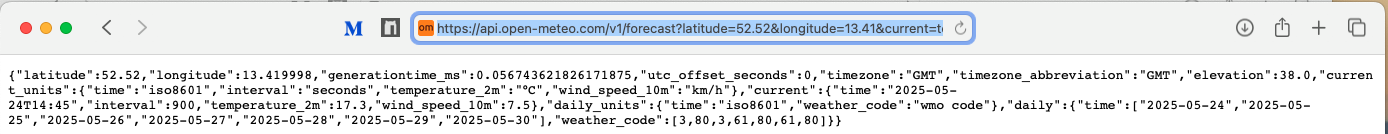


In [26]:
import pandas as pd

import requests

# Setup the Open-Meteo API client with cache and retry on error
# cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
# retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
# openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url_meteo = "https://api.open-meteo.com/v1/forecast"
params_meteo  = {
	"latitude": 52.52,
	"longitude": 13.41,
	"daily": "weather_code",
	"current": "weather_code",
	"timezone": "Europe/Berlin"
}
response=requests.get(url_meteo, params=params_meteo)
print(response.json()['daily'])

df_meteo=pd.DataFrame(response.json()['daily'])
df_meteo.info()
df_meteo

{'time': ['2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30'], 'weather_code': [3, 80, 3, 61, 80, 61, 80]}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          7 non-null      object
 1   weather_code  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


,time,weather_code
0,2025-05-24,3
1,2025-05-25,80
2,2025-05-26,3
3,2025-05-27,61
4,2025-05-28,80
5,2025-05-29,61
6,2025-05-30,80


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you

### Get weather data with an API

*   Use https://nominatim.org/ to get the gps coordinates of all the cities (no subscription required) Documentation : https://nominatim.org/release-docs/develop/api/Search/

*   Use https://openweathermap.org/appid (you have to subscribe to get a free apikey) and https://openweathermap.org/api/one-call-api to get some information about the weather for the 35 cities and put it in a DataFrame

*   Determine the list of cities where the weather will be the nicest within the next 7 days For example, you can use the values of daily.pop and daily.rain to compute the expected volume of rain within the next 7 days... But it's only an example, actually you can have different opinions on a what a nice weather would be like 😎 Maybe the most important criterion for you is the temperature or humidity, so feel free to change the rules !

*   Save all the results in a `.csv` file, you will use it later 😉 You can save all the informations that seem important to you ! Don't forget to save the name of the cities, and also to create a column containing a unique identifier (id) of each city (this is important for what's next in the project)

*   Use plotly to display the best destinations on a map

### Scrape Booking.com

Since BookingHoldings doesn't have aggregated databases, it will be much faster to scrape data directly from booking.com

You can scrap as many information asyou want, but we suggest that you get at least:

*   hotel name,
*   Url to its booking.com page,
*   Its coordinates: latitude and longitude
*   Score given by the website users
*   Text description of the hotel


### Create your data lake using S3

Once you managed to build your dataset, you should store into S3 as a csv file.

### ETL

Once you uploaded your data onto S3, it will be better for the next data analysis team to extract clean data directly from a Data Warehouse. Therefore, create a SQL Database using AWS RDS, extract your data from S3 and store it in your newly created DB.

## Deliverable 📬

To complete this project, your team should deliver:

* A `.csv` file in an S3 bucket containing enriched information about weather and hotels for each french city

* A SQL Database where we should be able to get the same cleaned data from S3

* Two maps where you should have a Top-5 destinations and a Top-20 hotels in the area. You can use plotly or any other library to do so. It should look something like this:

![Map](https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Kayak_best_destination_project.png)

Un exemple d'usage direct avec les entêtes demandés par le site nominatim.

In [8]:
import requests
headers = {'Accept': '*/*','User-Agent': 'jedha/des-ft-35'}
response=requests.get("https://nominatim.openstreetmap.org/search?q=gorges+du+verdon&format=json",headers=headers)
data= response.content
print(data)


b'[{"place_id":74158533,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"node","osm_id":7193513219,"lat":"43.7496562","lon":"6.3285616","class":"tourism","type":"attraction","place_rank":30,"importance":0.4098060475515065,"addresstype":"tourism","name":"Gorges du Verdon","display_name":"Gorges du Verdon, Route de la Maline, La Palud-sur-Verdon, Castellane, Alpes-de-Haute-Provence, Provence-Alpes-C\xc3\xb4te d\'Azur, France m\xc3\xa9tropolitaine, 04120, France","boundingbox":["43.7496062","43.7497062","6.3285116","6.3286116"]},{"place_id":74609150,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"node","osm_id":5645487126,"lat":"43.7403350","lon":"6.3799984","class":"tourism","type":"viewpoint","place_rank":30,"importance":5.81422140840317e-05,"addresstype":"tourism","name":"Gorges du Verdon","display_name":"Gorges du Verdon, Chemin de la Mescla, La Palud-sur-Verdon, Castellane, Alpes-

# Discussion autour de l'appréciation. d'une bonne météo pour un séjour

## WMO

En allant sur [ce lien](https://www.umr-cnrm.fr/dbfastex/tablesOMM/020003.an), le lecteur trouvera la correspondance entre le code entier et la description de la météo.
[Dictionnaire Json de l'interprétation du code WMO](https://gist.github.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c#file-descriptions-json)

### Considération sur les UV

Maximum quotidien dans l'indice UV à partir de 0. uv_index_clear_sky_max suppose des conditions sans nuages.
[Veuillez suivre les directives officielles de l'OMM pour l'indice ultraviolet.](https://www.who.int/news-room/questions-and-answers/item/radiation-the-ultraviolet-(uv)-index)



# Ma Solution
Dans cette section du NoteBook, vous trouverez ma solution pour le projet.
Cette dernière se décompose d'abord par une  approche décrivant le domaine du projet et ses exigences, puis je décris l'architecture retenue pour faire le projet. Dans une section je décris les problèmes rencontrés et les solutions retenues pour les résoudre ou les controuner. La dernière sous-section correspond à l'implémentation de la solution.

## Exigences du projet et Domaine




* Rappel des exigences
* La description du domaine.

### Code Mermaid des diagrammes




Il s'agit du code de génération de graphiques.

```mermaid
classDiagram
    class ClassName {
        +publicFunction()
        -privateFunction()
        #protectedFunction()
        ~packageOrInternalFunction()
        abstractFunction()*
        staticFunction()*
    }
```




## Implémentation


In [49]:
class FRANCE(Exception):
    pass

one_week_in_list=[]
def nice_weather(city_weather)->float:
  """
  fonction pour definir la note d'attractivité de la ville en fonction des
  valeurs journalières sur les 7 prochains jour de la météo.
  Il est bon de mettre en place une stratégie pour laisser le choix sur
  la méthode de calcul de l'indice d'attractivité.
  """
  return city_weather['weather_code'].mean()

# iteration sur la liste des villes
for ville in villes:
  ville_dict={"ville": ville}
  chaine=ville.strip()
  print(chaine)
  params={}
  params['format']='json'
  params['q']=chaine.replace(" ","+")+",fr" #'gorges+du+verdon'
  #params['country']='FR' # il est nécessaire de restreindre la localisation pour éviter des surprises au niveau mondial.
  response=requests.get("https://nominatim.openstreetmap.org/search",params=params, headers=headers) #?q=gorges+du+verdon&format=json
  data= response.json()
  #print(data[0])
  ville_dict["id"]=int(data[0]['osm_id'])

  try:
    ville_dict["latitude"]=float(data[0]['lat'])
    ville_dict["longitude"]=float(data[0]['lon'])
    ville_dict["France"]=((data[0]['display_name']).find("France") >0)
    if not ville_dict["France"]:
      raise (FRANCE())
  except FRANCE:
    print("le Point d'interêt n'est pas en France !")
  except OSError as err:
    print("OS error:", err)
  except ValueError:
    print("Could not convert data to an integer.")
  except Exception as err:
    print(f"Unexpected {err=}, {type(err)=}")
    raise
  print("id : ",ville_dict["id"])
  print("pays : ",ville_dict["France"])
  print("Latitude : ",data[0]['lat'])
  print("Longitude : ",data[0]['lon'])
  params_meteo={}
  params_meteo['latitude']=ville_dict["latitude"]
  params_meteo['longitude']=ville_dict["longitude"]
  params_meteo['daily']="weather_code"
  params_meteo['current']="weather_code"
  params_meteo['timezone']="Europe/Berlin"
  url_meteo = "https://api.open-meteo.com/v1/forecast"
  weather=requests.get(url_meteo, params=params_meteo)
  print(weather.json())
  print(weather.json()['daily']['weather_code'])
  df_meteo=pd.DataFrame(weather.json()['daily'])
  df_meteo.info()
  ville_dict['weather']=df_meteo
  print(type(ville_dict['weather']))
  ville_dict['nice']=nice_weather(df_meteo)
  print(ville_dict['nice'])
  one_week_in_list.append(ville_dict)
  print("_________________________________")

df_villes=pd.DataFrame.from_dict(one_week_in_list)

Mont Saint Michel
id :  211285890
pays :  True
Latitude :  48.6359541
Longitude :  -1.5114600
{'latitude': 48.62, 'longitude': -1.5, 'generationtime_ms': 0.04076957702636719, 'utc_offset_seconds': 7200, 'timezone': 'Europe/Berlin', 'timezone_abbreviation': 'GMT+2', 'elevation': 31.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'weather_code': 'wmo code'}, 'current': {'time': '2025-05-24T19:15', 'interval': 900, 'weather_code': 3}, 'daily_units': {'time': 'iso8601', 'weather_code': 'wmo code'}, 'daily': {'time': ['2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30'], 'weather_code': [3, 3, 3, 61, 3, 3, 45]}}
[3, 3, 3, 61, 3, 3, 45]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          7 non-null      object
 1   weather_code  7 non-null      int64 
dtypes: int64(1), object(1)
memor

In [28]:
df_villes


,ville,id,latitude,longitude,France,weather,nice
0,Mont Saint Michel,211285890,48.635954,-1.511460,True,time weather_code 0 2025-05-24 ...,17.285714
1,St Malo,905534,48.649518,-2.026041,True,time weather_code 0 2025-05-24 ...,17.285714
2,Bayeux,145776,49.276462,-0.702474,True,time weather_code 0 2025-05-24 ...,11.285714


In [21]:
df_villes.to_csv('kayak.csv')

In [22]:
import plotly.io as pio

# pio.renderers.default = "svg" # this line must be commented if working on colab
import plotly.express as px
fig = px.scatter_mapbox(df_villes, lat="latitude", lon="longitude", color="nice", size="nice",
                        zoom=4, mapbox_style="open-street-map")
fig.show()


You can scrap as many information asyou want, but we suggest that you get at least:

*   hotel name,
*   Url to its [booking.com page](https://www.booking.com),
*   Its coordinates: latitude and longitude
*   Score given by the website users
*  Text description of the hotel

https://www.booking.com/searchresults.fr.html?ss=Paris%2C+France&efdco=1&label=gog235jc-1DCAEoggI46AdIM1gDaE2IAQGYAQ24AQfIAQ3YAQPoAQGIAgGoAgO4AsecvsEGwAIB0gIkZGQ0NjIzZTEtMTdjNS00ZGYzLTg5OTktOGExNmMwNGZiYzk32AIE4AIB&sid=c5ea7df93d489d500c6c6fef40b91b41&aid=397594&lang=fr&sb=1&src_elem=sb&src=index&dest_id=-1456928&dest_type=city&checkin=2025-05-22&checkout=2025-06-04&group_adults=3&no_rooms=1&group_children=2&age=1&age=10&nflt=%3Bhotelfacility%3D4%3B


In [ ]:
booking=requests.get("https://www.booking.com/searchresults.fr.html?ss=Paris%2C+France&efdco=1&label=gog235jc-1DCAEoggI46AdIM1gDaE2IAQGYAQ24AQfIAQ3YAQPoAQGIAgGoAgO4AsecvsEGwAIB0gIkZGQ0NjIzZTEtMTdjNS00ZGYzLTg5OTktOGExNmMwNGZiYzk32AIE4AIB&sid=c5ea7df93d489d500c6c6fef40b91b41&aid=397594&lang=fr&sb=1&src_elem=sb&src=index&dest_id=-1456928&dest_type=city&checkin=2025-05-22&checkout=2025-06-04&group_adults=3&no_rooms=1&group_children=2&age=1&age=10&nflt=%3Bhotelfacility%3D4%3B")

In [ ]:
print(booking.content)

b'<!DOCTYPE html>\n<!--\nYou know you could be getting paid to poke around in our code?\nWe\'re hiring designers and developers to work in Amsterdam:\nhttps://careers.booking.com/\n-->\n<!-- wdot-802 -->\n<script type="text/javascript" nonce="n3McrmlqlersOFT">\ndocument.addEventListener(\'DOMContentLoaded\', function () {\n/**\n* provides the current user\'s cookie consent\n* in order to use it:\n* 1. inline privacy/cookieConsent.js in the page you need to use it.\n* please note that this library relies on window.PCM.isCountryNeedCookieBanner to be initialised\n* before using (calling getValue function) it\n* 2. in your js file:\n*\n* var privacyCookieConsent = B.require(\'privacyCookieConsent\');\n* var consent = privacyCookieConsent.getValue();\n*/\nB.define(\'privacyCookieConsent\', function () {\nvar consentGroupIsAllowed = {\nanalytical: \'C0002%3A1\',\nmarketing: \'C0004%3A1\'\n};\nvar optanonConsentCookieName = \'OptanonConsent\';\nvar optanonBoxClosedCookieName = \'OptanonAlert

utiliser Dash pour une interface cool de rendu.